# Nathan BOULOGNE et Philippe LEE

In [203]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
np.set_printoptions(threshold=10000,suppress=True)
warnings.filterwarnings('ignore')

# Partie 1

## Chargement des données et préparation

In [204]:
credit=pd.read_csv("./credit_scoring.csv",sep=";",header=0)

In [205]:
credit.columns

Index(['Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records', 'Job',
       'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price', 'Status'],
      dtype='object')

In [206]:
credit.head(5)

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


In [207]:
credit.shape

(4375, 14)

In [208]:
X=credit.iloc[:,:13].values
Y=credit.iloc[:,13].values
# .values va transformer en numpy array

In [209]:
mp=np.sum(Y==0)/len(Y)
bp=np.sum(Y==1)/len(Y)

print("Mauvais payeurs : {0:.2f} %. Bon payeur : {1:.2f} %".format(mp,bp))

Mauvais payeurs : 0.28 %. Bon payeur : 0.72 %


In [210]:
from sklearn.model_selection import train_test_split

In [211]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.5,random_state=1)

## Lancement des classifieurs

Dans ce problème, on utilise la précision car pour une banque c'est moins grave de ne pas donner crédit à une personne qui peut le rembourser donc d'avoir un FN que de prêter de l'argent à une personne qui ne peut finalement pas rembourser, FP. Donc il vaut mieux maximiser la précision c'est-à-dire avoir le moins de faux positif.

In [212]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [213]:
def classifieurs(Xtrain,Xtest,Ytrain,Ytest):
    DT=DecisionTreeClassifier(criterion='gini', random_state=1)   #criterion -> gini : arbre de type CART
    DT.fit(Xtrain,Ytrain)
    YDT=DT.predict(Xtest)

    KNN=KNeighborsClassifier(n_neighbors=5) #KNN
    KNN.fit(Xtrain,Ytrain)
    YKNN=KNN.predict(Xtest)

    print("Arbre de décision: Accuracy={0:.2f}%.".format(accuracy_score(Ytest,YDT)*100))
    print(confusion_matrix(Ytest,YDT))
    print("Precision : {0:.2f}%".format(precision_score(Ytest,YDT)*100))
    print()
    print("KNN: Accuracy={0:.2f}%.".format(accuracy_score(Ytest,YKNN)*100))
    print(confusion_matrix(Ytest,YKNN))
    print("Precision : {0:.2f}%".format(precision_score(Ytest,YKNN)*100))
    print()

In [214]:
classifieurs(Xtrain,Xtest,Ytrain,Ytest)

Arbre de décision: Accuracy=72.71%.
[[ 325  279]
 [ 318 1266]]
Precision : 81.94%

KNN: Accuracy=72.49%.
[[ 189  415]
 [ 187 1397]]
Precision : 77.10%



In [13]:
# rappel vs precision
# on va choisir la precision : la banque veut minimiser les FP

### Normalisation

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [215]:
#avec StandardScaler
ss=StandardScaler()
ss.fit(Xtrain)
Xtrain_norm=ss.transform(Xtrain)
Xtest_norm=ss.transform(Xtest)

In [216]:
classifieurs(Xtrain_norm,Xtest_norm,Ytrain,Ytest)

Arbre de décision: Accuracy=72.71%.
[[ 322  282]
 [ 315 1269]]
Precision : 81.82%

KNN: Accuracy=75.27%.
[[ 286  318]
 [ 223 1361]]
Precision : 81.06%



En normalisant nos données, on a des meilleurs résultats pour le KNN classifier, ce qui est normal car KNN fait des calculs sur des distances.

In [217]:
#avec MinMaxScaler
mm=MinMaxScaler()
mm.fit(Xtrain)
Xtrain_normmm=mm.transform(Xtrain)
Xtest_normmm=mm.transform(Xtest)
classifieurs(Xtrain_normmm,Xtest_normmm,Ytrain,Ytest)

Arbre de décision: Accuracy=72.85%.
[[ 325  279]
 [ 315 1269]]
Precision : 81.98%

KNN: Accuracy=74.54%.
[[ 283  321]
 [ 236 1348]]
Precision : 80.77%



Le random forest est meilleur (en terme de précision) avec MinMaxScaler qu'avec StandardScaler, mais le KNN est moins bon.
Pour la suite, nous utiliserons le StandardScaler.

### Ajout des variables

In [218]:
from sklearn.decomposition import PCA

In [219]:
pca=PCA(n_components=3)
pca.fit(Xtrain_norm)
Xtrain_pca=np.concatenate((Xtrain_norm,pca.transform(Xtrain_norm)),axis=1)
Xtest_pca=np.concatenate((Xtest_norm,pca.transform(Xtest_norm)),axis=1)

In [220]:
classifieurs(Xtrain_pca,Xtest_pca,Ytrain,Ytest)

Arbre de décision: Accuracy=73.63%.
[[ 351  253]
 [ 324 1260]]
Precision : 83.28%

KNN: Accuracy=75.64%.
[[ 283  321]
 [ 212 1372]]
Precision : 81.04%



En rajoutant aux données normalisées 3 composantes principales, on obtient des meilleurs résultats pour nos classifiers, notamment sur l'arbre de décision (83.28% de précision).

In [221]:
from sklearn.ensemble import BaggingClassifier

In [225]:
BAG=BaggingClassifier(n_estimators=100,random_state=1) #BAG
BAG.fit(Xtrain_pca,Ytrain)
YBAG=BAG.predict(Xtest_pca)
print("Bagging : Accuracy = {0:.2f}".format(accuracy_score(Ytest,YBAG)*100))
print(confusion_matrix(Ytest,YBAG))
print("Precision : {0:.2f}%".format(precision_score(Ytest,YBAG)*100))

Bagging : Accuracy = 78.66
[[ 321  283]
 [ 184 1400]]
Precision : 83.18%


Le bagging est un peu moins bien que l'arbre de décision.

In [26]:
from sklearn.ensemble import RandomForestClassifier

Index(['Income', 'Seniority', 'pca2', 'pca3', 'Price', 'pca1', 'Amount', 'Age',
       'Assets', 'Records', 'Expenses', 'Job', 'Time', 'Debt', 'Home',
       'Marital'],
      dtype='object')


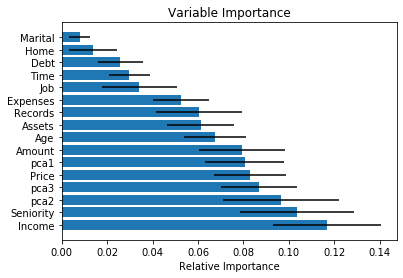

In [226]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(Xtrain_pca, Ytrain)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
ind2=pd.Index(['pca1','pca2','pca3'])
features = credit.columns[:-1].append(ind2)
print(features[sorted_idx])
padding = np.arange(Xtrain_pca.size/len(Xtrain_pca)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

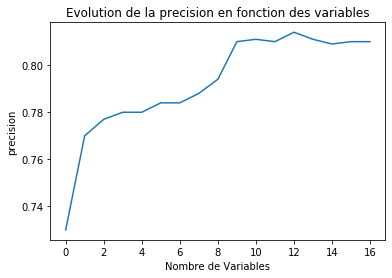

In [227]:
KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(Xtrain_pca.shape[1]+1)
for f in np.arange(0, Xtrain_pca.shape[1]+1):
    X1_f = Xtrain_pca[:,sorted_idx[:f+1]]
    X2_f = Xtest_pca[:,sorted_idx[:f+1]]
    KNN.fit(X1_f,Ytrain)
    YKNN=KNN.predict(X2_f)
    scores[f]=np.round(precision_score(Ytest,YKNN),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("precision")
plt.title("Evolution de la precision en fonction des variables")
plt.show()

On peut prendre 12 variables car c'est là que la precision atteint son max

In [228]:
features[sorted_idx[:12]]

Index(['Income', 'Seniority', 'pca2', 'pca3', 'Price', 'pca1', 'Amount', 'Age',
       'Assets', 'Records', 'Expenses', 'Job'],
      dtype='object')

In [229]:
from sklearn.model_selection import GridSearchCV

In [230]:
def eval_clf(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = 100 * accuracy_score(y_test, y_pred)
    prec = 100 * precision_score(y_test, y_pred)
    print(str(clf).split('(')[0])
    print("% accuracy = {:.2f}".format(acc))
    print("% precision = {:.2f}".format(prec))
    print(confusion_matrix(y_test, y_pred))
    print()

In [232]:
def gridsearch(clf, param):
    print(str(clf).split('(')[0])
    clf1 = GridSearchCV(clf, param, scoring='precision', cv=10)
    eval_clf(clf1, Xtrain_pca[:,sorted_idx[:12]], Xtest_pca[:,sorted_idx[:12]], Ytrain, Ytest)
    print(clf1.best_params_)
    print()

In [233]:
knn = KNeighborsClassifier()
param = {'n_neighbors':[1,3,5,7,9,11,13,15]}
gridsearch(knn, param)

dt = DecisionTreeClassifier(random_state=1)
param = {'max_depth':range(1,15)}
gridsearch(dt, param)

KNeighborsClassifier
GridSearchCV
% accuracy = 70.25
% precision = 80.31
[[ 301  303]
 [ 348 1236]]

{'n_neighbors': 1}

DecisionTreeClassifier
GridSearchCV
% accuracy = 76.74
% precision = 81.67
[[ 293  311]
 [ 198 1386]]

{'max_depth': 4}



En prenant les 12 variables les plus pertinentes:
- Le meilleur paramètre pour l'algo des K neighbors est en prenant un seul voisin.
- Pour l'arbre de décision, la profondeur optimale est 4 branches.

(toujours en considérant la précision comme fonction de scoring)

In [234]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.metrics import roc_auc_score

In [235]:
def pipeline(clf):
    """
    Renvoie une pipeline qui normalise, rajoute 3 composantes principales de l'ACP, puis applique un Classifier
    """
    combined_features = FeatureUnion([('scaler', StandardScaler()), ('pca',PCA(n_components=3))])
    return Pipeline([('scaler', StandardScaler()), ('pca',combined_features),\
                 ('clf', clf)])

In [236]:
# exemple de pipeline avec un KNN
pipeKNN=pipeline(KNeighborsClassifier(n_neighbors=3))
pipeKNN

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('scaler',
                                                 StandardScaler(copy=True,
                                                                with_mean=True,
                                                                with_std=True)),
                                                ('pca',
                                                 PCA(copy=True,
                                                     iterated_power='auto',
                                                     n_components=3,
                                                     random_state=None,
                                                     svd_solver='auto', tol=0.0,
                                                     whiten=False))],
                         

In [237]:
import pickle

In [238]:
outfile=open("pipeline","wb")
pickle.dump(pipeline,outfile)
outfile.close()

In [239]:
infile = open("pipeline",'rb')
pipeline2 = pickle.load(infile)
infile.close()

In [240]:
print(pipeline==pipeline2)

print(pipeline)
print(pipeline2)

True
<function pipeline at 0x00000262C9824F78>
<function pipeline at 0x00000262C9824F78>


Ce sont bien les mêmes fonctions.

In [241]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier

In [242]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate,cross_val_score
from time import time

In [249]:
def run_classifiers(clfs,X,Y):
    """
    Renvoie des estimations de l'accuracy, de l'AUC, de la precision et le temps d'execution \
    pour chaque classifier passe en entree, par 10 fold cross-validations 
    """
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    for i in clfs:    
        clf = clfs[i]
        print("Classifier: {0} ({1})".format(i,str(clf).split('(')[0]))
        scoring = {"acc":"accuracy","auc":"roc_auc","prec":"precision"}
        t1=time()
        cv = cross_validate(clf, X, Y, cv=kf,scoring=scoring)
        t2=time()  
        print("Accuracy with cv is: {0:.2f}% +/- {1:.2f}%".format(cv["test_acc"].mean()*100, cv["test_acc"].std()*100))
        print("AUC with cv = {0:.2f}% +/- {1:.2f}%".format(cv["test_auc"].mean()*100,cv["test_auc"].std()*100))
        print("Precision with cv = {0:.2f}% +/- {1:.2f}%".format(cv["test_prec"].mean()*100,cv["test_prec"].std()*100))
        print("Temps d'execution : {0:.5f}s".format(t2-t1))
        print()

In [250]:
def run_classifiers_pipe(clfs,X,Y):
    """
    Renvoie les resultats de run_classifier sur des donnees que l'on traite (normalisation,ACP)
    """
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    for i in clfs:    
        clf = clfs[i]
        pipe=pipeline(clf)
        print("Classifier: {0} ({1})".format(i,str(clf).split('(')[0]))
        scoring = {"acc":"accuracy","auc":"roc_auc","prec":"precision"}
        t1=time()
        cv = cross_validate(pipe, X, Y, cv=kf,scoring=scoring)
        t2=time()  
        print("Accuracy with cv is: {0:.2f}% +/- {1:.2f}%".format(cv["test_acc"].mean()*100, cv["test_acc"].std()*100))
        print("AUC with cv = {0:.2f}% +/- {1:.2f}%".format(cv["test_auc"].mean()*100,cv["test_auc"].std()*100))
        print("Precision with cv = {0:.2f}% +/- {1:.2f}%".format(cv["test_prec"].mean()*100,cv["test_prec"].std()*100))
        print("Temps d'execution : {0:.5f}s".format(t2-t1))
        print()

In [251]:
clfs = {
 'RF': RandomForestClassifier(n_estimators=50, random_state=1),
 'KNN': KNeighborsClassifier(n_neighbors=10),
 'NB' : GaussianNB(),
 'CART' : DecisionTreeClassifier(random_state=1),
 'ID3' : DecisionTreeClassifier(criterion="entropy",random_state=1),
 'stump' : DecisionTreeClassifier(max_depth=1,random_state=1),
 'MLPC' : MLPClassifier(random_state=1,hidden_layer_sizes=(20,10)),
 'KNN': KNeighborsClassifier(n_neighbors=5),
 'bagging' : BaggingClassifier(n_estimators=50),
 'adaboost' : AdaBoostClassifier(n_estimators=50),
 'RF' : RandomForestClassifier(n_estimators=50),
 'RF2' : RandomForestClassifier(n_estimators=12),
}

In [57]:
run_classifiers(clfs,X,Y)

Classifier: RF (RandomForestClassifier)
Accuracy with cv is: 78.72% +/- 1.70%
AUC with cv = 82.48% +/- 1.83%
Precision with cv = 82.15% +/- 2.02%
Temps d'execution : 1.97800s

Classifier: KNN (KNeighborsClassifier)
Accuracy with cv is: 71.52% +/- 1.70%
AUC with cv = 66.22% +/- 2.71%
Precision with cv = 76.69% +/- 1.94%
Temps d'execution : 0.29204s

Classifier: NB (GaussianNB)
Accuracy with cv is: 77.21% +/- 2.19%
AUC with cv = 79.09% +/- 2.59%
Precision with cv = 82.81% +/- 1.79%
Temps d'execution : 0.03200s

Classifier: CART (DecisionTreeClassifier)
Accuracy with cv is: 72.69% +/- 2.52%
AUC with cv = 65.56% +/- 3.18%
Precision with cv = 80.78% +/- 2.24%
Temps d'execution : 0.16300s

Classifier: ID3 (DecisionTreeClassifier)
Accuracy with cv is: 72.34% +/- 2.44%
AUC with cv = 66.35% +/- 2.95%
Precision with cv = 81.40% +/- 2.90%
Temps d'execution : 0.20396s

Classifier: stump (DecisionTreeClassifier)
Accuracy with cv is: 72.21% +/- 1.84%
AUC with cv = 61.81% +/- 2.83%
Precision with cv 

On regarde ici toujours la précision. Le meilleur algorithme ici est le Naive Bayes, qui est aussi l'un des plus rapides en temps d'execution. L'algorithme avec le moins de précision est le stump (arbre de décision à une branche).

# II. Apprentissage supervisé : Données hétérogènes

In [252]:
data=pd.read_csv("credit.data",sep="\t",header=None)

In [253]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [254]:
X=data.iloc[:,0:15].values
Y=data.iloc[:,15].values

In [255]:
col_num=[0,3,4,5,6,8,9,11,12]
Xnum = np.delete(X, col_num, 1)

In [256]:
Xnum.shape

(688, 6)

In [257]:
Xnum[Xnum=='?']='nan'

In [258]:
Xnum=Xnum.astype(float)

In [259]:
Y=Y[~np.isnan(Xnum).any(axis=1)]

In [260]:
Y.shape

(666,)

In [261]:
Xnum=Xnum[~np.isnan(Xnum).any(axis=1)]

In [262]:
Xnum.shape

(666, 6)

On a supprimé 22 lignes.

(array([299.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 367.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

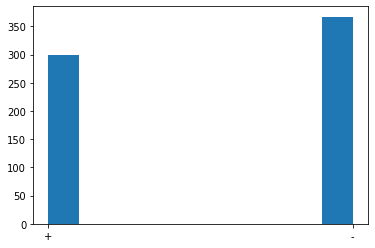

In [263]:
plt.hist(Y)

In [264]:
Y[Y=='+']=1
Y[Y=='-']=0

In [265]:
Y=Y.astype(float)

In [268]:
mp=np.sum(Y==0)*100/len(Y)
bp=np.sum(Y==1)*100/len(Y)

print("Crédit refusé : {0:.2f} %. Crédit accordé : {1:.2f} %".format(mp,bp))

Crédit refusé : 55.11 %. Crédit accordé : 44.89 %


In [267]:
run_classifiers(clfs,Xnum,Y)

Classifier: RF (RandomForestClassifier)
Accuracy with cv is: 77.63% +/- 5.22%
AUC with cv = 84.18% +/- 4.79%
Precision with cv = 78.38% +/- 4.52%
Temps d'execution : 0.74667s

Classifier: KNN (KNeighborsClassifier)
Accuracy with cv is: 70.86% +/- 3.88%
AUC with cv = 73.32% +/- 4.67%
Precision with cv = 71.24% +/- 6.44%
Temps d'execution : 0.05000s

Classifier: NB (GaussianNB)
Accuracy with cv is: 71.61% +/- 4.96%
AUC with cv = 79.31% +/- 5.80%
Precision with cv = 83.22% +/- 5.15%
Temps d'execution : 0.02200s

Classifier: CART (DecisionTreeClassifier)
Accuracy with cv is: 71.63% +/- 4.74%
AUC with cv = 71.13% +/- 5.12%
Precision with cv = 67.98% +/- 4.52%
Temps d'execution : 0.03503s

Classifier: ID3 (DecisionTreeClassifier)
Accuracy with cv is: 73.88% +/- 3.85%
AUC with cv = 73.41% +/- 4.49%
Precision with cv = 70.52% +/- 5.31%
Temps d'execution : 0.04103s

Classifier: stump (DecisionTreeClassifier)
Accuracy with cv is: 74.33% +/- 6.36%
AUC with cv = 72.28% +/- 5.19%
Precision with cv 

Sans normaliser nos données, nous regardons toujours principalement la précision, car on est dans le même type de données que dans la première partie du TP.

Le classifier avec la plus haute précision est le stump (arbre de décision à une branche). 

In [74]:
sc=StandardScaler()
Xnum_norm=sc.fit_transform(Xnum)

In [75]:
run_classifiers(clfs,Xnum_norm,Y)

Classifier: RF (RandomForestClassifier)
Accuracy with cv is: 79.28% +/- 5.21%
AUC with cv = 84.60% +/- 4.06%
Precision with cv = 80.54% +/- 4.46%
Temps d'execution : 0.69903s

Classifier: KNN (KNeighborsClassifier)
Accuracy with cv is: 74.49% +/- 6.22%
AUC with cv = 80.75% +/- 4.92%
Precision with cv = 78.98% +/- 9.60%
Temps d'execution : 0.05298s

Classifier: NB (GaussianNB)
Accuracy with cv is: 71.61% +/- 4.96%
AUC with cv = 79.32% +/- 5.79%
Precision with cv = 83.22% +/- 5.15%
Temps d'execution : 0.02302s

Classifier: CART (DecisionTreeClassifier)
Accuracy with cv is: 71.62% +/- 4.80%
AUC with cv = 71.15% +/- 5.18%
Precision with cv = 67.86% +/- 4.84%
Temps d'execution : 0.03400s

Classifier: ID3 (DecisionTreeClassifier)
Accuracy with cv is: 73.88% +/- 3.85%
AUC with cv = 73.41% +/- 4.49%
Precision with cv = 70.52% +/- 5.31%
Temps d'execution : 0.03900s

Classifier: stump (DecisionTreeClassifier)
Accuracy with cv is: 74.33% +/- 6.36%
AUC with cv = 72.28% +/- 5.19%
Precision with cv 

Certains algorithmes ont une meilleure précision en normalisant nos données, comme MLPC. Pour d'autres, la précision se détériore, comme pour la Random Forest à 12 arbres. Pour certains algorithmes, la normalisation ne change rien.

In [269]:
X=data.iloc[:,0:15].values
Y=data.iloc[:,15].values

col_num=[0,3,4,5,6,8,9,11,12]
X_num = np.delete(X, col_num, 1)
X_cat=np.delete(X, [1,2,7,10,13,14], 1)

In [270]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [271]:
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)

In [272]:
for col_id in range(len(col_num)):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
    X_cat[:, col_id] = val_idx
imp_cat = SimpleImputer(missing_values=0, strategy='most_frequent')
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])

In [273]:
X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray()

In [274]:
X_tot=np.concatenate((X_num,X_cat_bin),axis=1)

In [275]:
X_tot.shape

(688, 46)

In [276]:
Y[Y=='+']=1
Y[Y=='-']=0
Y=Y.astype(float)

In [277]:
run_classifiers(clfs,X_tot,Y)

Classifier: RF (RandomForestClassifier)
Accuracy with cv is: 87.21% +/- 3.36%
AUC with cv = 93.19% +/- 2.54%
Precision with cv = 85.09% +/- 5.39%
Temps d'execution : 0.71700s

Classifier: KNN (KNeighborsClassifier)
Accuracy with cv is: 69.50% +/- 5.33%
AUC with cv = 73.13% +/- 4.24%
Precision with cv = 69.16% +/- 8.01%
Temps d'execution : 0.08498s

Classifier: NB (GaussianNB)
Accuracy with cv is: 83.58% +/- 4.45%
AUC with cv = 91.52% +/- 3.84%
Precision with cv = 84.83% +/- 6.46%
Temps d'execution : 0.02499s

Classifier: CART (DecisionTreeClassifier)
Accuracy with cv is: 81.40% +/- 4.33%
AUC with cv = 81.26% +/- 4.56%
Precision with cv = 79.04% +/- 6.46%
Temps d'execution : 0.04297s

Classifier: ID3 (DecisionTreeClassifier)
Accuracy with cv is: 81.82% +/- 4.54%
AUC with cv = 81.80% +/- 4.41%
Precision with cv = 78.38% +/- 7.76%
Temps d'execution : 0.04900s

Classifier: stump (DecisionTreeClassifier)
Accuracy with cv is: 85.60% +/- 4.45%
AUC with cv = 86.57% +/- 4.00%
Precision with cv 

En prenant maintenant les variables catégorielles, la précision, l'accuracy et l'AUC sont globalemment meilleurs.

# III. Apprentissage supervisé sur des données textuelles : Feature engineering et Classification

In [89]:
sms=pd.read_csv('SMSSpamCollection.data',sep="\t",header=None)

In [90]:
sms.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [91]:
sms.shape

(5572, 2)

In [92]:
corpus=sms.iloc[:,1].values
Y=sms.iloc[:,0].values
Y[Y=="ham"]=0
Y[Y=="spam"]=1
Y=Y.astype(int)

In [173]:
nbspam=np.sum(Y==1)*100/len(Y)
nbham=np.sum(Y==0)*100/len(Y)

print("Nombre de spam : {0:.2f}%, Nombre de ham : {1:.2f}%".format(nbspam,nbham))

Nombre de spam : 13.41%, Nombre de ham : 86.59%


In [93]:
from sklearn.feature_extraction.text import CountVectorizer

In [95]:
CV=CountVectorizer(max_features=300,stop_words='english')
CV.fit(corpus)
X_bow=CV.transform(corpus)

In [96]:
X_bow.shape

(5572, 300)

In [278]:
X_bow.toarray()[0,:]
# 1er SMS: les 1 sont les mots cles.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], d

In [279]:
CV.vocabulary_
# tous les mots clefs de tous les SMS

{'great': 102,
 'world': 291,
 'got': 101,
 'wat': 275,
 'ok': 185,
 'lar': 133,
 'free': 90,
 'win': 283,
 'text': 240,
 'receive': 208,
 'txt': 263,
 'rate': 203,
 'apply': 18,
 'dun': 77,
 'say': 216,
 'early': 79,
 'don': 74,
 'think': 248,
 'hey': 116,
 'week': 279,
 'word': 288,
 'like': 143,
 'fun': 94,
 'xxx': 293,
 'send': 218,
 '50': 10,
 'speak': 231,
 'friends': 92,
 'network': 176,
 'customer': 59,
 'selected': 217,
 'prize': 199,
 'claim': 47,
 'code': 49,
 'mobile': 170,
 'latest': 136,
 'camera': 40,
 'gonna': 99,
 'home': 119,
 'soon': 229,
 'want': 274,
 'talk': 238,
 'stuff': 235,
 'tonight': 257,
 've': 268,
 'today': 253,
 'cash': 43,
 '100': 2,
 '000': 0,
 'cost': 57,
 '150p': 4,
 'day': 63,
 '16': 6,
 'reply': 210,
 'urgent': 266,
 'won': 286,
 'www': 292,
 'right': 211,
 'thank': 242,
 'wont': 287,
 'help': 115,
 'use': 267,
 'message': 163,
 'com': 51,
 'oh': 184,
 'watching': 277,
 'remember': 209,
 'yes': 297,
 'did': 67,
 'make': 158,
 'fine': 87,
 'way': 27

In [114]:
run_classifiers(clfs,X_bow.toarray(),Y)

Classifier: RF (RandomForestClassifier)
Accuracy with cv is: 97.68% +/- 0.71%
AUC with cv = 98.11% +/- 0.77%
Precision with cv = 93.69% +/- 3.42%
Temps d'execution : 2.77394s

Classifier: KNN (KNeighborsClassifier)
Accuracy with cv is: 94.42% +/- 1.08%
AUC with cv = 91.88% +/- 1.56%
Precision with cv = 98.37% +/- 2.12%
Temps d'execution : 1.24000s

Classifier: NB (GaussianNB)
Accuracy with cv is: nan% +/- nan%
AUC with cv = nan% +/- nan%
Precision with cv = nan% +/- nan%
Temps d'execution : 0.00798s

Classifier: CART (DecisionTreeClassifier)
Accuracy with cv is: 96.32% +/- 0.71%
AUC with cv = 92.44% +/- 2.57%
Precision with cv = 86.71% +/- 3.14%
Temps d'execution : 0.31001s

Classifier: ID3 (DecisionTreeClassifier)
Accuracy with cv is: 96.18% +/- 0.79%
AUC with cv = 92.09% +/- 2.05%
Precision with cv = 87.21% +/- 3.95%
Temps d'execution : 0.34098s

Classifier: stump (DecisionTreeClassifier)
Accuracy with cv is: 89.09% +/- 1.24%
AUC with cv = 59.91% +/- 2.18%
Precision with cv = 92.04% 

Les meilleurs algorithmes en terme d'accuracy ici sont le MLPClassifier ainsi que les Random Forest.
Les résultats des autres algo sont tout aussi bien puisqu'on a souvent plus de 95% d'accuracy (sauf le stump).

# TFIDF

In [100]:
from sklearn.feature_extraction.text import TfidfTransformer

In [103]:
TFIDF=TfidfTransformer()
TFIDF.fit(X_bow)
X_tfidf=TFIDF.transform(X_bow)

In [104]:
X_tfidf.toarray()[0,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [117]:
run_classifiers(clfs,X_tfidf.toarray(),Y)

Classifier: RF (RandomForestClassifier)
Accuracy with cv is: 97.70% +/- 0.58%
AUC with cv = 98.25% +/- 0.88%
Precision with cv = 94.78% +/- 2.87%
Temps d'execution : 11.54200s

Classifier: KNN (KNeighborsClassifier)
Accuracy with cv is: 94.96% +/- 0.80%
AUC with cv = 93.68% +/- 1.90%
Precision with cv = 96.13% +/- 2.89%
Temps d'execution : 22.87397s

Classifier: NB (GaussianNB)
Accuracy with cv is: 68.88% +/- 1.25%
AUC with cv = 80.27% +/- 0.98%
Precision with cv = 29.44% +/- 2.25%
Temps d'execution : 0.42000s

Classifier: CART (DecisionTreeClassifier)
Accuracy with cv is: 96.61% +/- 0.95%
AUC with cv = 92.12% +/- 2.40%
Precision with cv = 88.32% +/- 3.72%
Temps d'execution : 5.74400s

Classifier: ID3 (DecisionTreeClassifier)
Accuracy with cv is: 96.63% +/- 0.79%
AUC with cv = 91.45% +/- 2.24%
Precision with cv = 89.65% +/- 3.24%
Temps d'execution : 5.44203s

Classifier: stump (DecisionTreeClassifier)
Accuracy with cv is: 89.09% +/- 1.24%
AUC with cv = 59.91% +/- 2.18%
Precision with c

En transformant nos données avec l'algo de normalisation et de pondération de l'importance TFIDF, nous obtenons des résultats plus ou moins équivalents : Nous gagnons 0.02% sur la première Random Forest, nous perdons 0.06% sur le MLPClassifier...

# SVD, LSA, LSI

Polysémie: un même mot peut avoir plusieurs sens

Synonymie:2 mots clefs qui ont le même sens

In [107]:
from sklearn.decomposition import TruncatedSVD

In [108]:
SVD= TruncatedSVD(n_components=30)
SVD.fit(X_tfidf)
X_svd=SVD.transform(X_tfidf)

In [109]:
X_svd[0,:]

array([ 0.11782245,  0.02089514, -0.06422193, -0.02765607, -0.06164277,
       -0.10576071,  0.01879089,  0.00284323, -0.21227443,  0.24416113,
        0.06508329, -0.24265889,  0.02244799, -0.01769285,  0.03867698,
       -0.01155733, -0.01748537,  0.01639556, -0.03656722,  0.0025183 ,
        0.03851961, -0.02867225, -0.02692959, -0.01635288,  0.06556135,
       -0.00259917,  0.03797629, -0.03406886,  0.05139639,  0.0732636 ])

In [110]:
X_svd.shape

(5572, 30)

In [172]:
run_classifiers(clfs,X_svd,Y)

Classifier: RF (RandomForestClassifier)
Accuracy with cv is: 97.25% +/- 0.77%
AUC with cv = 97.35% +/- 0.99%
Precision with cv = 95.12% +/- 1.88%
Temps d'execution : 4.65700s

Classifier: KNN (KNeighborsClassifier)
Accuracy with cv is: 96.41% +/- 0.74%
AUC with cv = 95.59% +/- 1.39%
Precision with cv = 90.67% +/- 4.74%
Temps d'execution : 1.67100s

Classifier: NB (GaussianNB)
Accuracy with cv is: 65.94% +/- 1.85%
AUC with cv = 89.97% +/- 1.49%
Precision with cv = 26.67% +/- 2.63%
Temps d'execution : 0.07403s

Classifier: CART (DecisionTreeClassifier)
Accuracy with cv is: 95.33% +/- 1.19%
AUC with cv = 90.02% +/- 2.82%
Precision with cv = 82.73% +/- 4.99%
Temps d'execution : 0.95797s

Classifier: ID3 (DecisionTreeClassifier)
Accuracy with cv is: 95.46% +/- 0.94%
AUC with cv = 89.94% +/- 2.27%
Precision with cv = 83.65% +/- 3.09%
Temps d'execution : 0.99100s

Classifier: stump (DecisionTreeClassifier)
Accuracy with cv is: 87.69% +/- 0.89%
AUC with cv = 81.20% +/- 2.17%
Precision with cv 

Globalement, en utilisant SVD pour régler les problèmes de Polysémie et de Synonymie, les résultats dans tous les algorithmes deviennent homogènes autour des 97% d'accuracy. Le meilleur algorithme devient le bagging, mais les Random Forest et le MLPC sont toujours très bons même si ils perdent un peu en accuracy.

In [120]:
pipeword=Pipeline([("cv",CountVectorizer(max_features=300,stop_words='english')),("tfidf",TfidfTransformer()),\
                   ("svd",TruncatedSVD(n_components=20))])

# Données yelp

In [165]:
yelp=pd.read_csv("yelp-text-by-stars.csv",sep=";",header=0,encoding="ANSI")

In [130]:
yelp.head()

,Stars,Text
0,1,Boarded my English Mastiff here over New Year'...
1,1,Another case of the Emperor's New Clothes. So...
2,1,Came on Valentine's Day night having pre-bough...
3,1,2Nd time eating here today.1st time was great ...
4,1,Allegiant is a disaster. Their fares are chea...


In [166]:
corpusyelp=yelp.iloc[:,1].values
Yyelp=yelp.iloc[:,0].values

In [167]:
Yyelp=Yyelp.astype(int)
Yyelp[Yyelp<4]=0
Yyelp[Yyelp>=4]=1

In [177]:
nbbon=np.sum(Yyelp==1)*100/len(Yyelp)
nbmauvais=np.sum(Yyelp==0)*100/len(Yyelp)

print("Mauvaises notes : {0:.2f}%, Bonnes notes : {1:.2f}%".format(nbmauvais,nbbon))

Mauvaises notes : 34.05%, Bonnes notes : 65.95%


In [168]:
test=pipeword.fit_transform(corpusyelp,Yyelp)

In [171]:
run_classifiers(clfs,test,Yyelp)

Classifier: RF (RandomForestClassifier)
Accuracy with cv is: 78.13% +/- 0.61%
AUC with cv = 84.37% +/- 0.53%
Precision with cv = 80.36% +/- 0.70%
Temps d'execution : 67.25662s

Classifier: KNN (KNeighborsClassifier)
Accuracy with cv is: 74.58% +/- 0.52%
AUC with cv = 78.93% +/- 0.64%
Precision with cv = 80.33% +/- 0.67%
Temps d'execution : 118.38799s

Classifier: NB (GaussianNB)
Accuracy with cv is: 73.63% +/- 0.60%
AUC with cv = 79.00% +/- 0.72%
Precision with cv = 81.19% +/- 0.41%
Temps d'execution : 0.26597s

Classifier: CART (DecisionTreeClassifier)
Accuracy with cv is: 70.09% +/- 0.67%
AUC with cv = 66.90% +/- 0.85%
Precision with cv = 77.42% +/- 0.72%
Temps d'execution : 9.91403s

Classifier: ID3 (DecisionTreeClassifier)
Accuracy with cv is: 70.68% +/- 0.66%
AUC with cv = 67.59% +/- 0.66%
Precision with cv = 77.90% +/- 0.70%
Temps d'execution : 14.72398s

Classifier: stump (DecisionTreeClassifier)
Accuracy with cv is: 65.95% +/- 0.53%
AUC with cv = 61.68% +/- 0.63%
Precision with

Les algorithmes prennent beaucoup plus de temps ici. Les meilleurs résultats sont encore obtenus avec les Random Forest, et avec le MLPClassifier. L'accuracy ne dépasse pas les 80%.